In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

In [2]:
df = pd.read_csv("sa_fl_tempos.csv")

df

,dia,tempo,caminho
0,seg,58,luz
1,ter,55,tamanduateí
2,qua,55,luz
3,qui,62,tamanduateí
4,sex,58,luz
5,seg,57,tamanduateí
6,ter,62,luz
7,qua,54,tamanduateí
8,qui,55,luz
9,sex,59,tamanduateí


<Axes: xlabel='tempo', ylabel='Count'>

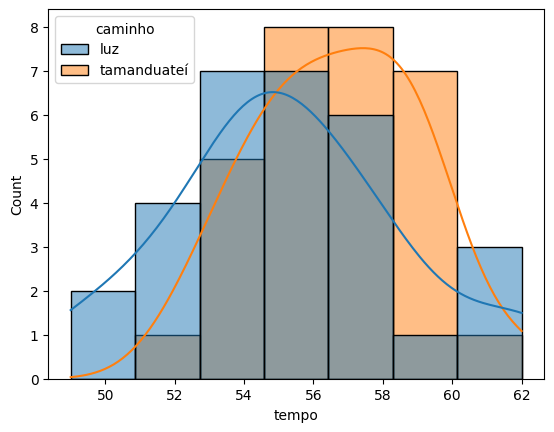

In [4]:
sns.histplot(data=df, x="tempo", kde=True, hue="caminho")

In [5]:
df.groupby(["caminho"])[["tempo"]].describe()

tempo                                                    
            count       mean       std   min   25%   50%    75%   max
caminho                                                              
luz          30.0  55.266667  3.393029  49.0  54.0  55.0  57.00  62.0
tamanduateí  30.0  56.700000  2.409035  52.0  55.0  57.0  58.75  62.0

In [6]:
# teste de hipoteses

mu_L, mu_T = df.groupby(["caminho"])[["tempo"]].mean().values.squeeze()

mu_L, mu_T 

(55.266666666666666, 56.7)

In [7]:
mu_L - mu_T 

-1.4333333333333371

In [8]:
std_L, std_T = df.groupby(["caminho"])[["tempo"]].std().values.squeeze() 

std_L, std_T   # desvio padrão

(3.3930286880839833, 2.409034718691714)

In [9]:
n_L, n_T = df.groupby(["caminho"])[["tempo"]].count().values.squeeze() 

n_L, n_T

(30, 30)

In [10]:
SE = np.sqrt((std_L**2/n_L) + (std_T**2/n_T))

SE

0.7597388137604261

In [11]:
z_score = ((mu_L - mu_T) - 0) / SE

z_score

-1.8866132773168023

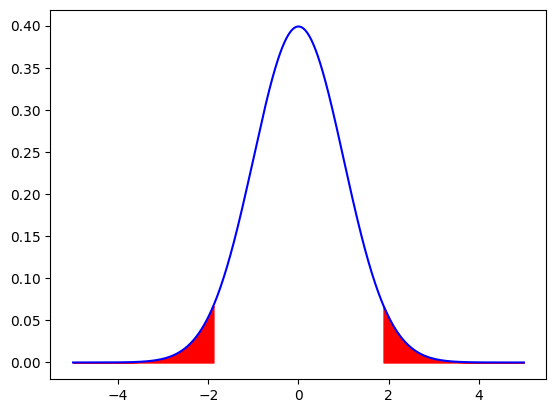

In [12]:
mean = 0 
std = 1

x_min = -5
x_max = 5

x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.plot(x,y, 'b')

x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y, color='r')

x=np.linspace(-z_score, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y, color='r')

plt.show()

In [15]:
# p-value

(scipy.stats.norm.cdf(z_score)*100)*2

5.9212359625495905

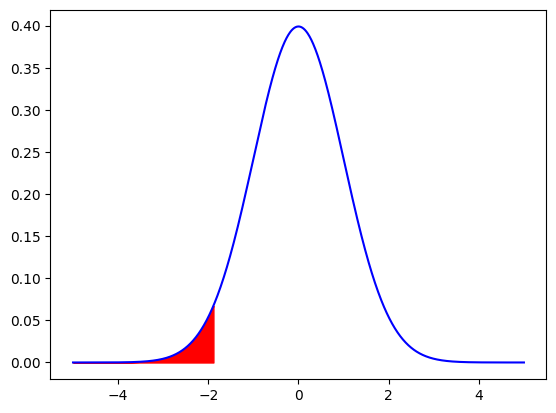

In [16]:
# teste bicaudal vs teste unicaudal

mean = 0 
std = 1

x_min = -5
x_max = 5

x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.norm.pdf(x)
plt.plot(x,y, 'b')

x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.norm.pdf(x)
plt.fill_between(x, y, color='r')

In [17]:
scipy.stats.norm.cdf(z_score)*100

2.9606179812747953

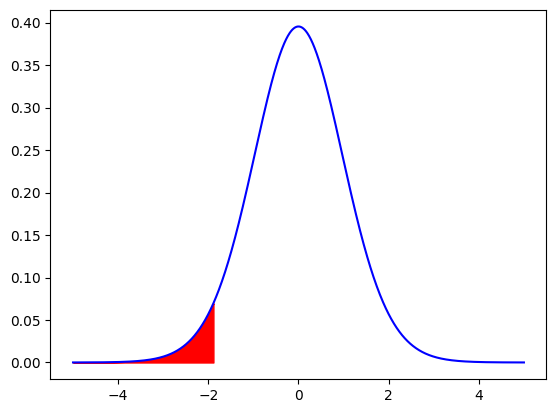

In [19]:
# teste t de student

# student t-distribution

mean = 0 
std = 1

x_min = -5
x_max = 5

x=np.linspace(x_min, x_max, 1000)
y=scipy.stats.t.pdf(x, df=29)
plt.plot(x,y, 'b')

x=np.linspace(x_min, z_score, 1000)
y=scipy.stats.t.pdf(x, df=29)
plt.fill_between(x, y, color='r')

plt.show()

In [21]:
scipy.stats.t.cdf(z_score, df=29)*100

3.463067832127425

In [7]:
# correlação

# coeficiente de correlação a Pearson

df_pa = pd.read_csv("alturas_pesos.csv")
df_pa

,sexo,altura,peso
0,M,187.57,109.72
1,M,174.71,73.62
2,M,188.24,96.50
3,M,182.20,99.81
4,M,177.50,93.60
...,...,...,...
9995,F,168.08,62.04
9996,F,170.35,77.51
9997,F,162.22,58.28
9998,F,175.35,74.32


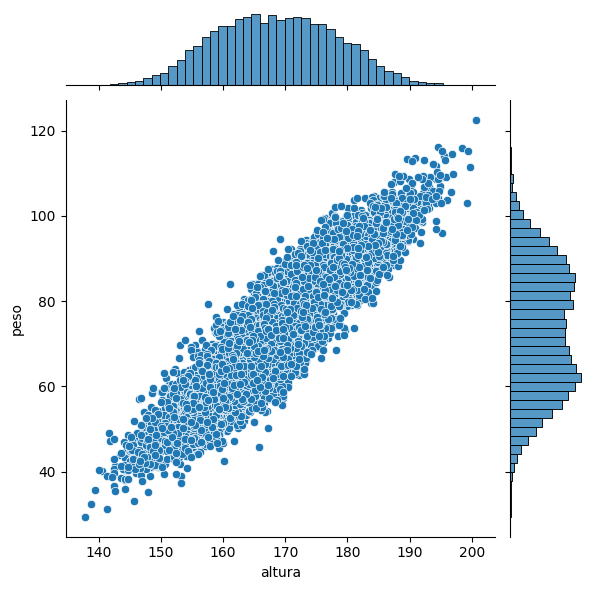

In [3]:
sns.jointplot(data=df_pa, x="altura", y="peso")

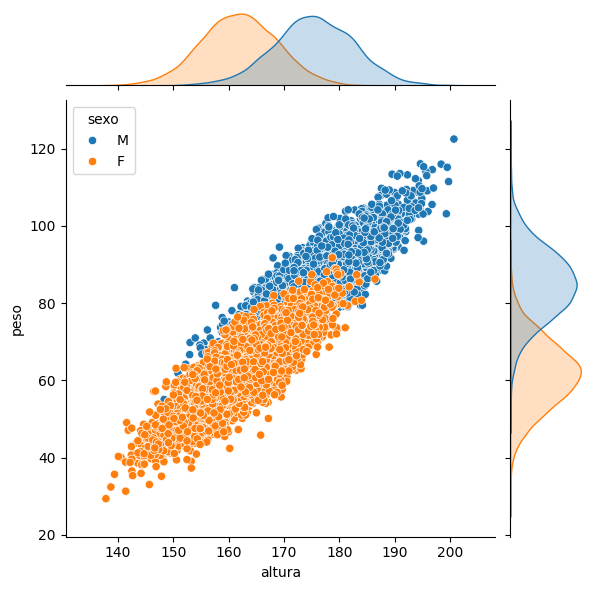

In [4]:
sns.jointplot(data=df_pa, x="altura", y="peso", hue="sexo")

In [11]:
df_pa.groupby("sexo").corr(method="pearson")

altura      peso
sexo                           
F    altura  1.000000  0.849614
     peso    0.849614  1.000000
M    altura  1.000000  0.862980
     peso    0.862980  1.000000

In [12]:
scipy.stats.pearsonr(df_pa["peso"], df_pa["altura"])

PearsonRResult(statistic=0.9247587419983448, pvalue=0.0)

In [13]:
# coeficiente de correlação de spearman

df_pa.groupby("sexo").corr(method="spearman")

altura      peso
sexo                           
F    altura  1.000000  0.836493
     peso    0.836493  1.000000
M    altura  1.000000  0.848555
     peso    0.848555  1.000000

In [14]:
df_bc = pd.read_csv("breast_cancer.csv")

df_bc

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


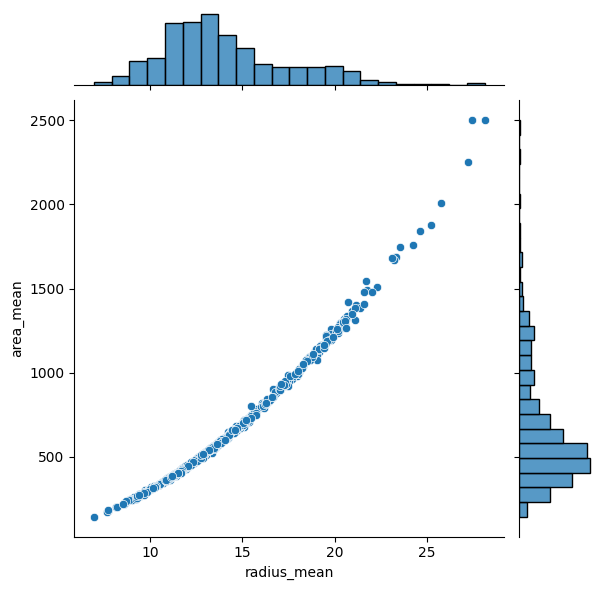

In [15]:
sns.jointplot(data=df_bc, x="radius_mean", y="area_mean")